<a href="https://colab.research.google.com/github/arghi082k1/Competitive-Programming-Algos/blob/master/ARGHYA_DEEP_SAHA_Outlier_detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
df.shape

(4410, 24)

**HANDLING NULL VALUES**

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
df['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [ ]:
df['NumCompaniesWorked']=df['NumCompaniesWorked'].fillna(0.1)

In [ ]:
df['TotalWorkingYears'].value_counts()

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
2.0      93
14.0     93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
26.0     42
28.0     42
25.0     42
0.0      33
29.0     30
32.0     27
31.0     27
33.0     21
27.0     21
30.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

In [ ]:
df['TotalWorkingYears'].fillna(10.0,inplace = True)

In [ ]:
df.isnull().sum().sum()

0

**CATEGORICAL ENCODING**

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [ ]:
categorical_columns = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','Over18','MaritalStatus']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in categorical_columns:
    df[i]=encoder.fit_transform(df[i])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,1,0,1,131160,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,1,6,2,41890,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,4,7,1,193280,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,3,1,1,83210,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,1,7,2,23420,4.0,0,12,8,2,9.0,2,6,0,4


STANDARDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [ ]:
copy_data = df.copy()
data_scaled = Scaler.fit_transform(copy_data)
copy_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,1,0,1,131160,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,1,6,2,41890,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,4,7,1,193280,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,3,1,1,83210,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,1,7,2,23420,4.0,0,12,8,2,9.0,2,6,0,4


OUTLIER DETECTION

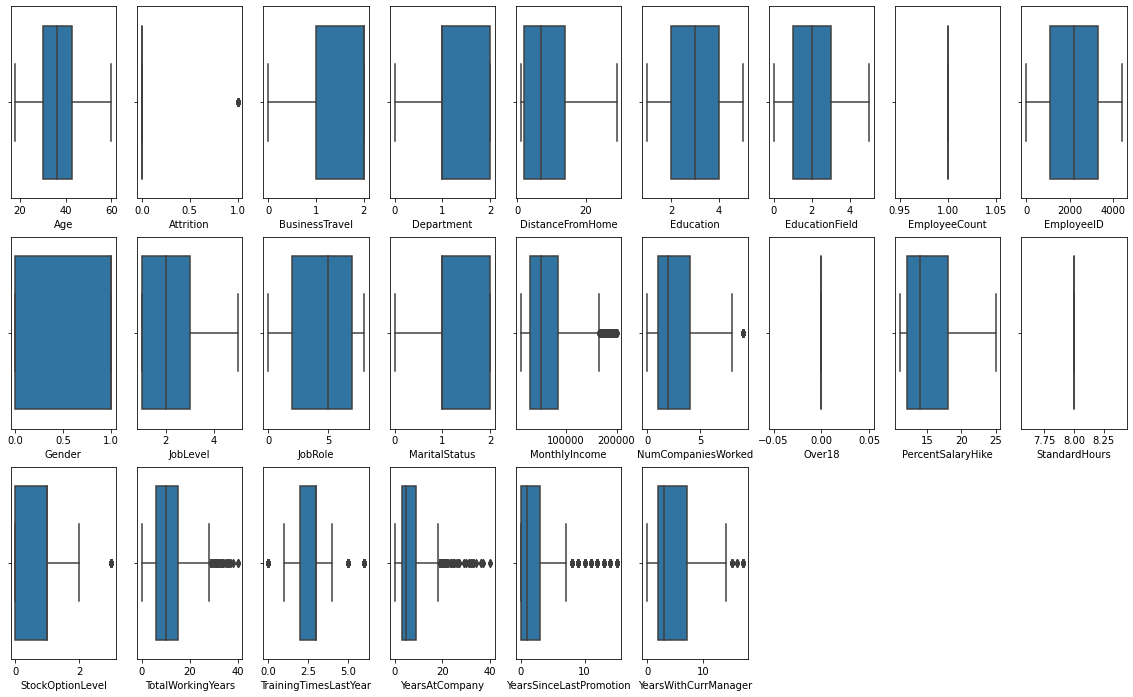

In [ ]:
features_ = df.columns.values[:]
fig=plt.figure(figsize=(20,12))
for column,feature in enumerate(features_):
    fig.add_subplot(3,9,column+1)
    sns.boxplot(df[feature],data=df)
plt.show()

USING Z-SCORE

In [ ]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean=np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [ ]:
detect_outliers(df['YearsAtCompany'])

[36,
 29,
 27,
 31,
 32,
 34,
 26,
 31,
 31,
 26,
 32,
 26,
 33,
 29,
 33,
 32,
 33,
 36,
 26,
 30,
 27,
 37,
 40,
 33,
 33,
 36,
 29,
 27,
 31,
 32,
 34,
 26,
 31,
 31,
 26,
 32,
 26,
 33,
 29,
 33,
 32,
 33,
 36,
 26,
 30,
 27,
 37,
 40,
 33,
 33,
 36,
 29,
 27,
 31,
 32,
 34,
 26,
 31,
 31,
 26,
 32,
 26,
 33,
 29,
 33,
 32,
 33,
 36,
 26,
 30,
 27,
 37,
 40,
 33,
 33]

In [ ]:
detect_outliers(df['MonthlyIncome'])

[]

REPLACING THE OUTLIERS

In [ ]:
def replace_outlier(data):
    outlier=[]
    threshhold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if(z_score>3):
            data.replace(i,3,inplace=True)
            outlier.append(i)
        elif(z_score<-3):
            data.replace(i,-3,inplace=True)
            outlier.append(i)
    return outlier

In [ ]:
replace_outlier(df['YearsAtCompany'])

[36, 29, 27, 31, 32, 34, 26, 33, 30, 37, 40]

In [ ]:
replace_outlier(df['MonthlyIncome'])

[]

USING IQR

In [ ]:
q1= df['YearsAtCompany'].quantile(0.25)
q3= df['YearsAtCompany'].quantile(0.75)

In [ ]:
IQR = q3-q1

In [ ]:
lower_bound_value = q1 - IQR*1.5
higher_bound_value = q3 + IQR*1.5

print(lower_bound_value)
print(higher_bound_value)

-6.0
18.0


In [ ]:
df[df['YearsAtCompany']<lower_bound_value]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
df[df['YearsAtCompany']>higher_bound_value] #These Are Outliers in years at company

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
10,45,0,2,1,17,2,3,1,11,1,2,2,1,79910,0.0,0,13,8,2,21.0,2,20,4,10
23,42,0,2,1,4,4,1,1,24,1,1,4,1,89260,1.0,0,14,8,0,10.0,4,20,11,6
37,42,0,1,2,2,2,2,1,38,1,3,5,1,29560,5.0,0,13,8,0,23.0,2,20,4,8
42,41,0,2,1,29,1,1,1,43,1,1,2,2,23790,1.0,0,12,8,0,22.0,6,22,0,4
53,45,0,1,1,3,1,3,1,54,0,1,7,0,35400,1.0,0,13,8,0,24.0,6,24,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,45,0,0,1,2,3,3,1,4371,0,2,6,2,103680,6.0,0,12,8,2,23.0,2,19,12,8
4383,42,0,2,1,7,4,1,1,4384,0,2,7,1,34450,1.0,0,11,8,2,22.0,2,22,11,15
4396,45,0,2,1,18,1,1,1,4397,0,2,8,1,58110,0.0,0,14,8,0,25.0,4,24,1,7
4403,39,0,1,1,22,3,3,1,4404,0,1,4,2,129650,0.0,0,19,8,1,20.0,2,19,11,8


In [ ]:
q1= df['MonthlyIncome'].quantile(0.25)
q3= df['MonthlyIncome'].quantile(0.75)
IQR = q3-q1


In [ ]:
lower_bound_value = q1 - IQR*1.5
higher_bound_value = q3 + IQR*1.5

print(lower_bound_value)
print(higher_bound_value)

-52925.0
165835.0


In [ ]:
df[df['MonthlyIncome']<lower_bound_value]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
df[df['MonthlyIncome']>higher_bound_value] #These Are Outliers in monthly income

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2,32,0,1,1,17,4,4,1,3,1,4,7,1,193280,1.0,0,15,8,3,5.0,2,5,0,3
55,33,0,1,1,9,3,1,1,56,1,4,5,1,193920,6.0,0,12,8,1,12.0,3,10,8,8
56,39,0,2,2,1,4,1,1,57,1,1,7,1,196650,1.0,0,22,8,1,21.0,6,21,11,10
73,27,0,0,1,2,3,1,1,74,1,1,5,1,168230,0.0,0,17,8,0,6.0,3,5,1,4
76,45,0,2,2,3,1,2,1,77,0,1,7,1,171740,9.0,0,14,8,1,12.0,6,10,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,30,0,2,0,1,4,0,1,4320,0,1,3,1,174260,2.0,0,12,8,1,12.0,0,10,7,4
4320,38,0,2,2,1,1,3,1,4321,1,2,2,2,176030,4.0,0,16,8,0,12.0,0,8,0,7
4360,40,0,0,1,28,2,1,1,4361,1,1,4,1,167040,9.0,0,22,8,0,5.0,2,3,0,2
4377,59,0,2,1,5,3,1,1,4378,0,3,3,1,198330,3.0,0,13,8,0,7.0,2,1,0,0


REMOVING OUTLIERS

In [ ]:
df=df[df['MonthlyIncome']<higher_bound_value]
df=df[df['YearsAtCompany']<higher_bound_value]
df.shape

(4068, 24)

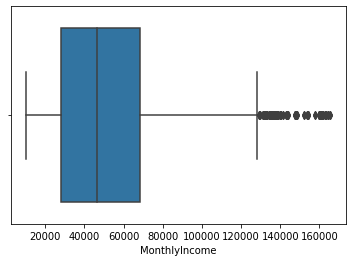

In [ ]:
sns.boxplot(df['MonthlyIncome'],data=df)
plt.show()

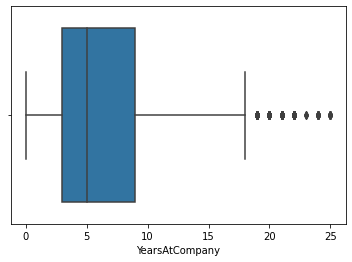

In [ ]:
sns.boxplot(df['YearsAtCompany'],data=df)
plt.show()